In [1]:
from PIL import Image
import cv2
import os
import numpy as np

prototxt_path = "library/deploy.prototxt.txt"

model_path = "library/res10_300x300_ssd_iter_140000_fp16.caffemodel"

In [2]:
# загрузим модель Caffe
model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

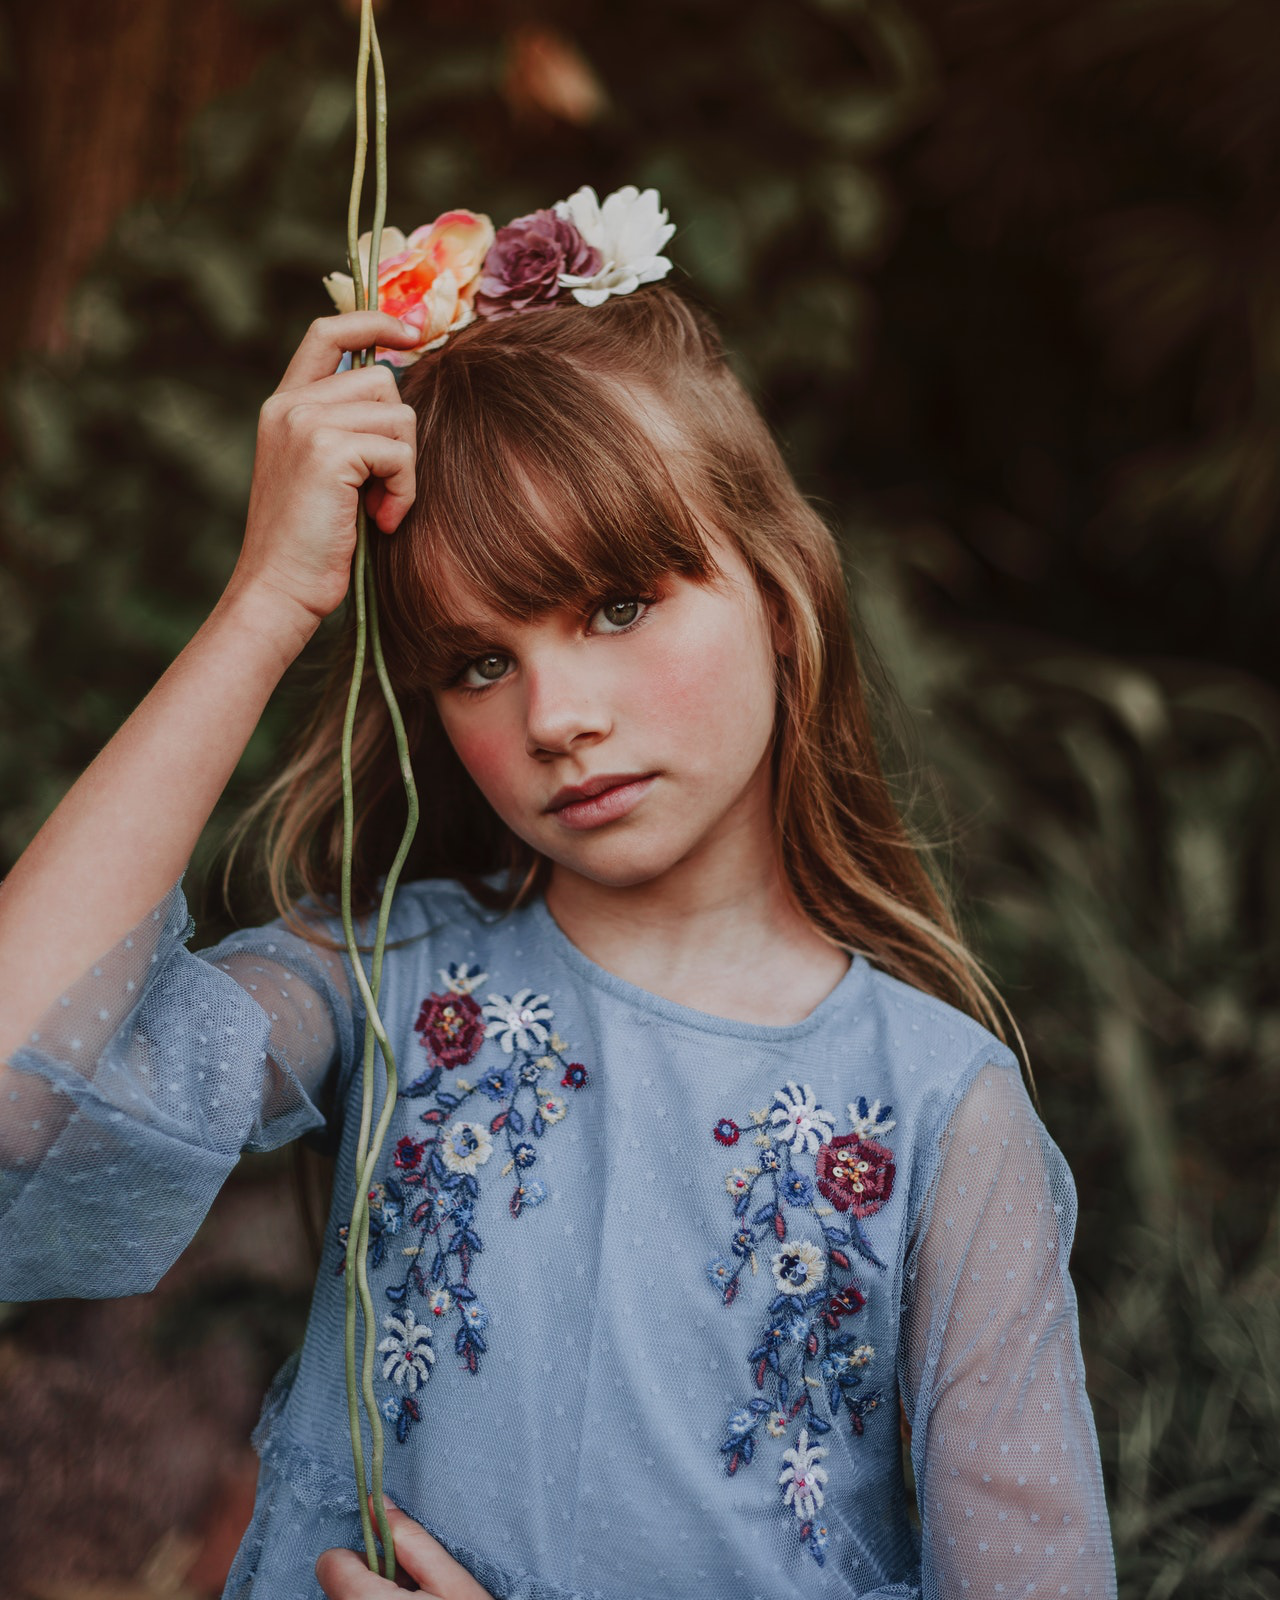

In [3]:
image_begin=Image.open('Img.jpg')

# читаем изображение
image = cv2.imread("Img.jpg")
# получаем ширину и высоту изображения
h, w = image.shape[:2]

image_begin



In [4]:
# предварительная обработка: изменение размера и вычитание среднего
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

In [5]:
# устанавливаем на вход нейронной сети изображение
model.setInput(blob)
# выполняем логический вывод и получаем результат
output = np.squeeze(model.forward())

In [6]:
font_scale = 1.0
for i in range(0, output.shape[0]):
    # получить уверенность
    confidence = output[i, 2]
    # если достоверность выше 50%, то нарисуйте окружающий прямоугольник
    if confidence > 0.3:
        # получить координаты окружающего блока и масштабировать их до исходного изображения
        box = output[i, 3:7] * np.array([w, h, w, h])
        # преобразовать в целые числа
        start_x, start_y, end_x, end_y = box.astype(np.int32)
        # рисуем прямоугольник вокруг лица
        cv2.rectangle(image, (start_x, start_y), (end_x, end_y), color=(255, 0, 0), thickness=2)
        # также нарисуем текст - вероятности классификатора
        cv2.putText(image, f"{confidence*100:.2f}%", (start_x, start_y-5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), 2)

In [7]:
# show the image
cv2.imshow("image", image)
cv2.waitKey(0)
# save the image with rectangles
cv2.imwrite("kids_detected_dnn.jpg", image)

True